In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('flats.csv', sep='^')
df

,Общая площадь,Площадь кухни,Жилая площадь,Этаж,Балкон или лоджия,Тип комнат,Санузел,Окна,Ремонт,Мебель,...,Год постройки,Высота потолков,Тёплый пол,Запланирован снос,Отделка,Название новостройки,"Корпус, строение",Официальный застройщик,Тип участия,Срок сдачи
0,61 м²,8 м²,45 м²,3 из 19,балкон,изолированные,раздельный,"во двор, на улицу",евро,"кухня, хранение одежды, спальные места",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26 м²,6 м²,NaN,8 из 9,NaN,NaN,совмещенный,"на улицу, на солнечную сторону",косметический,"кухня, хранение одежды, спальные места",...,1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14 м²,NaN,12 м²,1 из 5,NaN,NaN,совмещенный,во двор,требует ремонта,NaN,...,1964.0,2.6 м,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.8 м²,NaN,NaN,1 из 9,NaN,NaN,совмещенный,во двор,требует ремонта,NaN,...,1971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,168 м²,15 м²,105 м²,3 из 5,лоджия,изолированные,раздельный,во двор,дизайнерский,"кухня, хранение одежды, спальные места",...,1998.0,3.1 м,есть,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,66 м²,10.5 м²,39 м²,9 из 10,балкон,изолированные,раздельный,во двор,требует ремонта,NaN,...,1957.0,3 м,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2530,51 м²,15 м²,NaN,2 из 17,NaN,смежные,совмещенный,"во двор, на улицу, на солнечную сторону",евро,"кухня, хранение одежды, спальные места",...,NaN,2.7 м,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2531,41 м²,9 м²,NaN,13 из 14,лоджия,NaN,совмещенный,во двор,дизайнерский,"кухня, хранение одежды, спальные места",...,1977.0,3 м,есть,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2532,53 м²,9.1 м²,31.7 м²,7 из 14,лоджия,изолированные,раздельный,"во двор, на улицу",требует ремонта,NaN,...,1969.0,0 м,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Общая площадь           2534 non-null   object 
 1   Площадь кухни           1886 non-null   object 
 2   Жилая площадь           1708 non-null   object 
 3   Этаж                    2534 non-null   object 
 4   Балкон или лоджия       1173 non-null   object 
 5   Тип комнат              1360 non-null   object 
 6   Санузел                 2157 non-null   object 
 7   Окна                    1928 non-null   object 
 8   Ремонт                  2130 non-null   object 
 9   Мебель                  672 non-null    object 
 10  Техника                 574 non-null    object 
 11  Способ продажи          2240 non-null   object 
 12  Вид сделки              1501 non-null   object 
 13  Тип дома                2534 non-null   object 
 14  Этажей в доме           2534 non-null   

In [4]:
df.columns

Index(['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж',
       'Балкон или лоджия', 'Тип комнат', 'Санузел', 'Окна', 'Ремонт',
       'Мебель', 'Техника', 'Способ продажи', 'Вид сделки', 'Тип дома',
       'Этажей в доме', 'Пассажирский лифт', 'Грузовой лифт', 'В доме', 'Двор',
       'Парковка', 'Цена', 'Валюта', 'Местоположение', 'Ссылка',
       'Год постройки', 'Высота потолков', 'Тёплый пол', 'Запланирован снос',
       'Отделка', 'Название новостройки', 'Корпус, строение',
       'Официальный застройщик', 'Тип участия', 'Срок сдачи'],
      dtype='object')

In [7]:
df['Местоположение'].value_counts()

жилой комплекс Волжский Парк, корп. 1     23
ш. Алтуфьевское, стр. 2.1                 19
пос. Сосенское, дер. Столбово, стр. 15    18
ш. Перовское, уч. 2                       18
Москва, ул. Липчанского, 10               16
                                          ..
Москва, Бирюлёвская ул., 31к3              1
Москва, ул. Фёдора Полетаева, 32к4         1
Москва, Карамышевская наб., 2А             1
Москва, улица Васильцовский Стан, 10к1     1
Москва, Большая Пироговская ул., 8         1
Name: Местоположение, Length: 1854, dtype: int64

In [8]:
df['Парковка'].value_counts()

открытая во дворе                                                                813
подземная                                                                        247
за шлагбаумом во дворе                                                           154
открытая во дворе, за шлагбаумом во дворе                                         53
подземная, за шлагбаумом во дворе                                                 47
подземная, открытая во дворе                                                      40
подземная, открытая во дворе, за шлагбаумом во дворе                              23
наземная многоуровневая                                                           21
наземная многоуровневая, открытая во дворе                                        19
подземная, наземная многоуровневая, открытая во дворе                              9
наземная многоуровневая, за шлагбаумом во дворе                                    8
подземная, наземная многоуровневая                               

In [9]:
df_filtred = df[['Цена', 'Местоположение', 'Общая площадь', 'Год постройки', 'Вид сделки',
       'Ремонт', 'Этаж', 'Этажей в доме', 'Окна','Балкон или лоджия',
       'Тип дома', 'Парковка']]

In [11]:
num_features = ['Цена',
    'Общая площадь', 'Год постройки', 'Этаж', 'Этажей в доме',
]
cat_features = ['Местоположение','Вид сделки', 'Ремонт', 'Окна','Балкон или лоджия','Тип дома', 'Парковка']
target = 'Цена'


In [12]:
df_filtred_before = df_filtred.isna().sum()
df_filtred_before

Цена                    0
Местоположение          0
Общая площадь           0
Год постройки        1042
Вид сделки           1033
Ремонт                404
Этаж                    0
Этажей в доме           0
Окна                  606
Балкон или лоджия    1361
Тип дома                0
Парковка             1086
dtype: int64

In [13]:
year_of_const_random = np.random.choice(df_filtred['Ремонт'].dropna(), 2534)
df_filtred['Ремонт'] = df_filtred['Ремонт'].fillna(pd.Series(year_of_const_random))

In [14]:
repair_random = np.random.choice(df_filtred['Вид сделки'].dropna(), 2534)
df_filtred['Вид сделки'] = df_filtred['Вид сделки'].fillna(pd.Series(repair_random))

In [15]:
window_random = np.random.choice(df_filtred['Окна'].dropna(), 2534)
df_filtred['Окна'] = df_filtred['Окна'].fillna(pd.Series(window_random))

In [16]:
balcony_random = np.random.choice(df_filtred['Балкон или лоджия'].dropna(), 2534)
df_filtred['Балкон или лоджия'] = df_filtred['Балкон или лоджия'].fillna(pd.Series(balcony_random))

In [17]:
parking_random = np.random.choice(df_filtred['Парковка'].dropna(), 2534)
df_filtred['Парковка'] = df_filtred['Парковка'].fillna(pd.Series(parking_random))

In [18]:
df_filtred['Год постройки'] = df_filtred['Год постройки'].fillna(df_filtred['Год постройки'].median())

In [19]:
df_filtred.isna().sum()

Цена                 0
Местоположение       0
Общая площадь        0
Год постройки        0
Вид сделки           0
Ремонт               0
Этаж                 0
Этажей в доме        0
Окна                 0
Балкон или лоджия    0
Тип дома             0
Парковка             0
dtype: int64

In [20]:
df_filtred['Парковка'].value_counts()

открытая во дворе                                                                1447
подземная                                                                         432
за шлагбаумом во дворе                                                            260
открытая во дворе, за шлагбаумом во дворе                                          99
подземная, открытая во дворе                                                       76
подземная, за шлагбаумом во дворе                                                  75
подземная, открытая во дворе, за шлагбаумом во дворе                               39
наземная многоуровневая                                                            33
наземная многоуровневая, открытая во дворе                                         24
подземная, наземная многоуровневая, открытая во дворе                              13
подземная, наземная многоуровневая, открытая во дворе, за шлагбаумом во дворе      11
наземная многоуровневая, за шлагбаумом во дворе       

In [23]:
df_filtred['Местоположение'].value_counts()

1732.0    23
1846.0    19
1771.0    18
1853.0    18
1422.0    16
          ..
177.0      1
1594.0     1
431.0      1
1626.0     1
202.0      1
Name: Местоположение, Length: 1854, dtype: int64

In [24]:
for col in cat_features:
    df_filtred[col] = df_filtred[col].astype('category')
    df_filtred[col] = df_filtred[col].cat.codes
    df_filtred[col] = df_filtred[col].astype(float)

In [25]:
df['Тип дома'].value_counts()

панельный              898
монолитный             799
кирпичный              597
монолитно-кирпичный    141
блочный                 99
Name: Тип дома, dtype: int64

In [26]:
df['Балкон или лоджия'].value_counts()

балкон            606
лоджия            512
балкон, лоджия     55
Name: Балкон или лоджия, dtype: int64

In [27]:
df['Окна'].value_counts()

во двор                                    1010
на улицу                                    344
во двор, на улицу                           274
во двор, на солнечную сторону               128
во двор, на улицу, на солнечную сторону      94
на улицу, на солнечную сторону               54
на солнечную сторону                         24
Name: Окна, dtype: int64

In [28]:
df['Ремонт'].value_counts()

косметический      616
евро               554
требует ремонта    548
дизайнерский       412
Name: Ремонт, dtype: int64

In [29]:
df_filtred['Этаж'] = df_filtred['Этаж'].astype(str)
df_filtred['Этаж'] = df_filtred['Этаж'].str.extract(r'(\d+)')
df_filtred['Этаж'] = df_filtred['Этаж'].astype(float)

In [30]:
df_filtred['Общая площадь'] = df_filtred['Общая площадь'].replace(r'\D', '', regex=True)
df_filtred['Общая площадь'] = df_filtred['Общая площадь'].astype(float)

In [31]:
df_filtred.corr()

,Цена,Местоположение,Общая площадь,Год постройки,Вид сделки,Ремонт,Этаж,Этажей в доме,Окна,Балкон или лоджия,Тип дома,Парковка
Цена,1.000000,-0.088446,0.272135,-0.000384,-0.015451,-0.202194,0.118183,0.090003,0.042995,0.030474,-0.143657,0.050806
Местоположение,-0.088446,1.000000,0.038455,0.017106,0.000757,0.057918,0.076476,0.115311,-0.097826,-0.010209,0.087866,0.003172
Общая площадь,0.272135,0.038455,1.000000,-0.047907,-0.005046,-0.029047,0.143401,0.118646,0.053339,0.023885,-0.007717,0.016782
Год постройки,-0.000384,0.017106,-0.047907,1.000000,0.005865,-0.011462,0.072863,0.086147,-0.011141,0.041539,0.034697,0.045900
Вид сделки,-0.015451,0.000757,-0.005046,0.005865,1.000000,0.012039,-0.003319,-0.001547,0.001149,-0.004535,0.024140,0.008748
Ремонт,-0.202194,0.057918,-0.029047,-0.011462,0.012039,1.000000,-0.136056,-0.099538,-0.015092,-0.024044,0.113516,-0.020527
Этаж,0.118183,0.076476,0.143401,0.072863,-0.003319,-0.136056,1.000000,0.667690,0.113526,0.030504,0.088452,0.142641
Этажей в доме,0.090003,0.115311,0.118646,0.086147,-0.001547,-0.099538,0.667690,1.000000,0.063386,0.053863,0.186338,0.208232
Окна,0.042995,-0.097826,0.053339,-0.011141,0.001149,-0.015092,0.113526,0.063386,1.000000,0.025139,-0.035332,0.072916
Балкон или лоджия,0.030474,-0.010209,0.023885,0.041539,-0.004535,-0.024044,0.030504,0.053863,0.025139,1.000000,0.040234,0.003886


In [32]:
df_filtred.corr()['Цена'].apply(np.abs).sort_values(ascending = False)

Цена                 1.000000
Общая площадь        0.272135
Ремонт               0.202194
Тип дома             0.143657
Этаж                 0.118183
Этажей в доме        0.090003
Местоположение       0.088446
Парковка             0.050806
Окна                 0.042995
Балкон или лоджия    0.030474
Вид сделки           0.015451
Год постройки        0.000384
Name: Цена, dtype: float64

In [33]:
df_filtred.isna().sum()

Цена                 0
Местоположение       0
Общая площадь        0
Год постройки        0
Вид сделки           0
Ремонт               0
Этаж                 0
Этажей в доме        0
Окна                 0
Балкон или лоджия    0
Тип дома             0
Парковка             0
dtype: int64

In [34]:
df_filtred_before

Цена                    0
Местоположение          0
Общая площадь           0
Год постройки        1042
Вид сделки           1033
Ремонт                404
Этаж                    0
Этажей в доме           0
Окна                  606
Балкон или лоджия    1361
Тип дома                0
Парковка             1086
dtype: int64

In [35]:
df['Вид сделки'].value_counts()

возможна ипотека                  1467
аукцион                             13
продажа доли                        12
возможна ипотека, аукцион            7
возможна ипотека, продажа доли       2
Name: Вид сделки, dtype: int64

In [36]:
df_filtred['Вид сделки'].value_counts() 

1.0    2480
0.0      21
4.0      19
2.0       9
3.0       5
Name: Вид сделки, dtype: int64

In [37]:
df['Вид сделки'].value_counts()

возможна ипотека                  1467
аукцион                             13
продажа доли                        12
возможна ипотека, аукцион            7
возможна ипотека, продажа доли       2
Name: Вид сделки, dtype: int64

In [38]:
df_filtred.sort_values('Цена', ascending=False)

,Цена,Местоположение,Общая площадь,Год постройки,Вид сделки,Ремонт,Этаж,Этажей в доме,Окна,Балкон или лоджия,Тип дома,Парковка
330,800000000.0,54.0,620.0,2019.0,1.0,2.0,12.0,12,5.0,2.0,3.0,7.0
2258,478800000.0,838.0,228.0,1979.0,1.0,0.0,2.0,5,1.0,2.0,1.0,7.0
1782,478665420.0,1320.0,600.0,1979.0,1.0,1.0,1.0,2,0.0,0.0,1.0,6.0
947,463224600.0,34.0,415.0,1979.0,1.0,0.0,5.0,8,0.0,2.0,1.0,5.0
499,400000000.0,1096.0,200.0,1979.0,1.0,0.0,1.0,7,0.0,2.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2200000.0,1036.0,511.0,1979.0,4.0,2.0,5.0,16,2.0,2.0,4.0,5.0
1620,2150000.0,1606.0,173.0,1961.0,1.0,3.0,1.0,5,0.0,2.0,1.0,5.0
1535,2090000.0,671.0,13.0,1959.0,1.0,2.0,1.0,5,0.0,0.0,1.0,5.0
801,1729000.0,140.0,10.0,1979.0,0.0,3.0,1.0,3,0.0,0.0,1.0,0.0


In [39]:
df_filtred[target].value_counts()

11500000.0    29
13500000.0    27
12500000.0    23
12000000.0    20
15000000.0    20
              ..
6364834.0      1
11219913.0     1
61336000.0     1
14950000.0     1
99600000.0     1
Name: Цена, Length: 1072, dtype: int64

In [40]:
correlation = df_filtred[num_features].corr()
correlation

,Цена,Общая площадь,Год постройки,Этаж,Этажей в доме
Цена,1.000000,0.272135,-0.000384,0.118183,0.090003
Общая площадь,0.272135,1.000000,-0.047907,0.143401,0.118646
Год постройки,-0.000384,-0.047907,1.000000,0.072863,0.086147
Этаж,0.118183,0.143401,0.072863,1.000000,0.667690
Этажей в доме,0.090003,0.118646,0.086147,0.667690,1.000000


<AxesSubplot:>

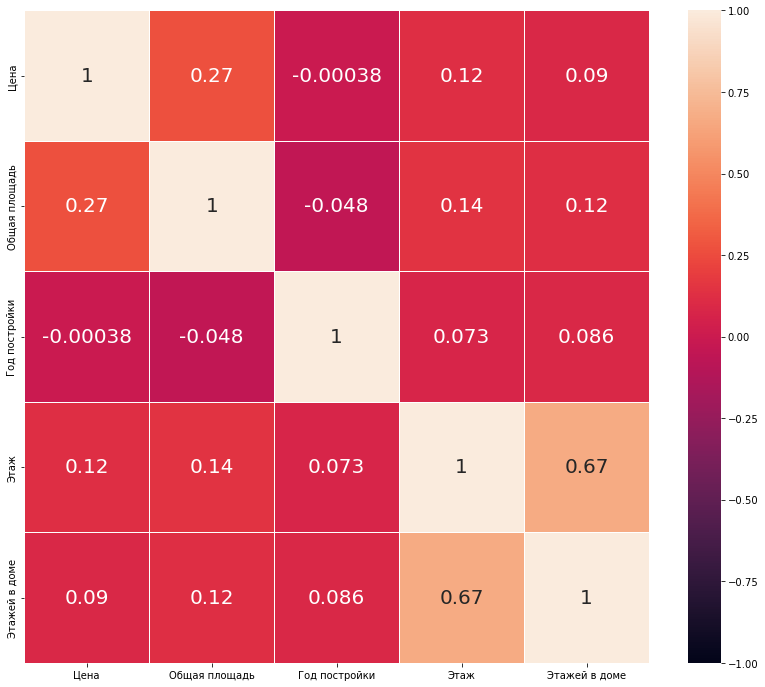

In [41]:
fig, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(correlation, annot=True, linecolor = 'white', linewidth=0.5,
           annot_kws = {'size' : 20}, vmax = 1, vmin =-1)

In [42]:
df_melted = pd.melt(df_filtred, id_vars='Цена', value_vars=cat_features)

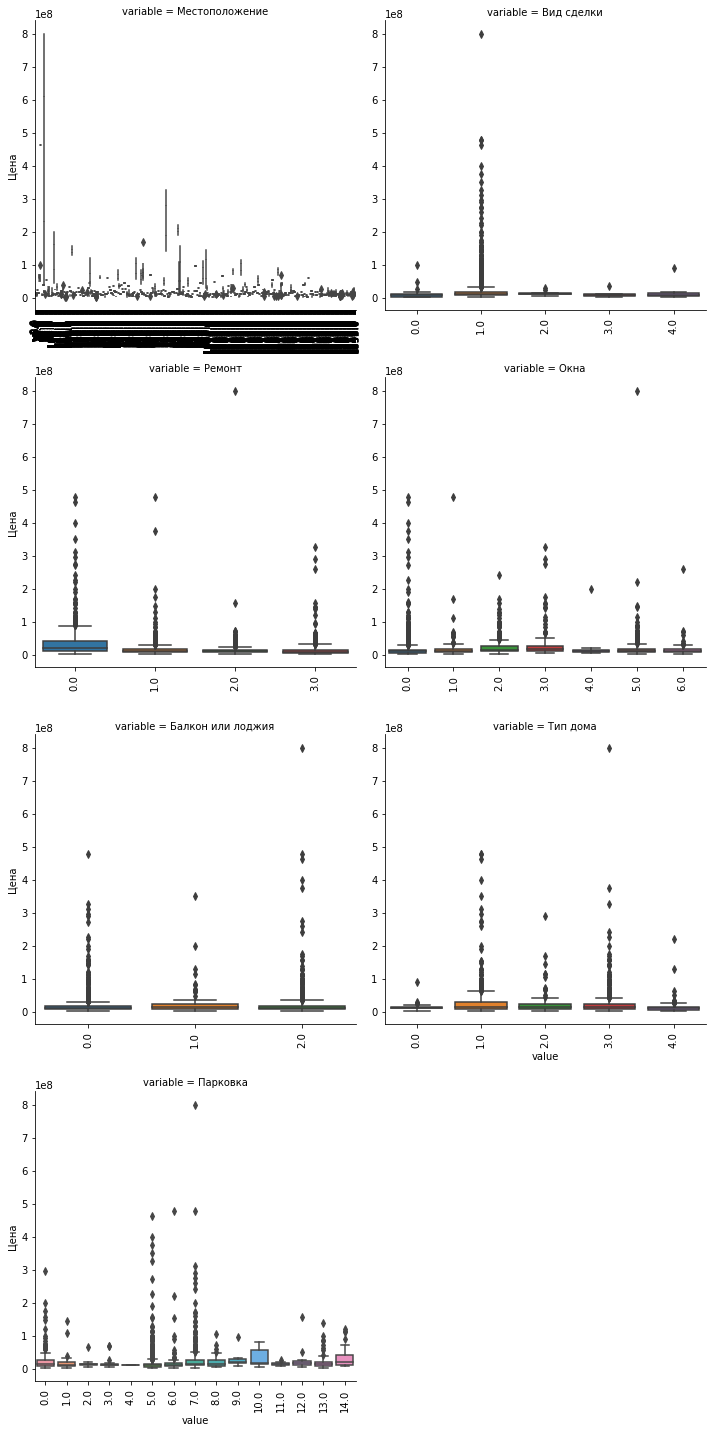

In [43]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

g = sns.FacetGrid(df_melted, col='variable',
                col_wrap=2, sharex=False, sharey=False, height=5)

g.map(boxplot, 'value', 'Цена')

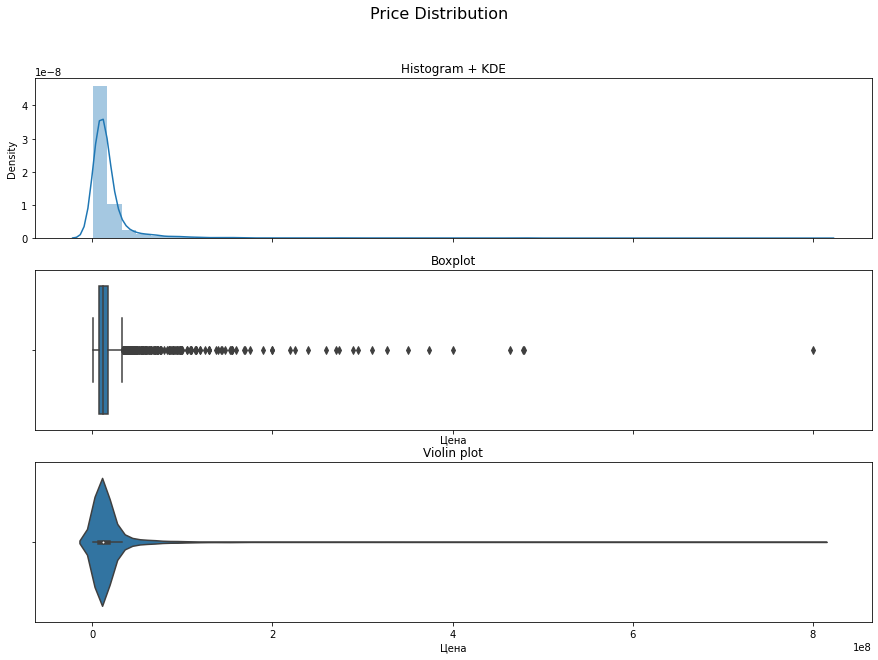

In [44]:
N = 10 **4 
np.random.seed(42)

def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15, 10))
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x=x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x=x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize =16)
    plt.show()


plot_comparison(df_filtred['Цена'], 'Price Distribution')

In [60]:
# можно добавить бинарную переменную инфроструктура